# 🎵 Spotify Music Data Analysis

## Project Overview
This project analyzes Spotify track data to understand:
- What factors influence song popularity
- How popularity changes over time
- Differences between explicit and non-explicit tracks

The cleaned dataset is later uploaded to **Google BigQuery** for SQL analysis and visualized using **Looker Studio**.



## 🧠 Business Problem

Music streaming platforms like Spotify manage millions of tracks.  
Understanding **what makes a song popular** is crucial for:

- Curating better playlists
- Promoting artists effectively
- Improving listener engagement

This analysis aims to answer questions such as:
- How is song popularity distributed?
- Which genres perform best?
- How does popularity change over time?
- Do explicit songs perform differently?
- Who are the top artists each year?


## 📊 Dataset Description

The dataset contains information about Spotify tracks, including:

- Track and artist details
- Release date information
- Popularity scores (0–100)
- Audio features such as danceability and energy
- Explicit content indicator

Each row represents a single track.


## 🧹 Data Cleaning & Preparation

Before analysis, the dataset was cleaned to ensure accuracy and consistency.

Cleaning steps included:
- Handling missing values
- Converting release dates to datetime format
- Extracting release year
- Removing unused columns
- Standardizing text fields
- Validating numeric ranges

This ensures the data is reliable for analysis and visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spotify.csv')

In [3]:
data.shape

(85000, 19)

In [4]:
data.columns

Index(['track_id', 'track_name', 'artist_name', 'album_name', 'release_date',
       'genre', 'duration_ms', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'instrumentalness', 'tempo', 'stream_count',
       'country', 'explicit', 'label'],
      dtype='object')

In [5]:
data.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [6]:
data.count()

,0
track_id,85000
track_name,84979
artist_name,85000
album_name,84954
release_date,85000
genre,85000
duration_ms,85000
popularity,85000
danceability,85000
energy,85000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

In [8]:
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? True


In [9]:
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


In [10]:
data.isnull().sum()

,0
track_id,0
track_name,21
artist_name,0
album_name,46
release_date,0
genre,0
duration_ms,0
popularity,0
danceability,0
energy,0


In [11]:
(data.isnull().sum() / len(data)) * 100

,0
track_id,0.000000
track_name,0.024706
artist_name,0.000000
album_name,0.054118
release_date,0.000000
genre,0.000000
duration_ms,0.000000
popularity,0.000000
danceability,0.000000
energy,0.000000


In [12]:
data[data.isnull().sum(axis=1) > 0]

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
1524,TRK-160AEB256B3C,Wait never fly pull,Jose Palmer,NaN,2025-06-16,R&B,313674,18,0.15,0.93,9,-33.36,0,0.447,150.86,1000,France,0,EMI
3450,TRK-5F85D57B35D2,NaN,Joshua Mendoza,Sit dream,2024-08-20,EDM,317305,42,0.74,0.47,6,-33.19,0,0.405,123.45,1000,United States,0,Warner Music
5501,TRK-2C00D79ABB40,Not but upon tend,Curtis Morris,NaN,2021-07-23,Indie,254159,38,0.82,0.94,11,-43.60,1,0.034,111.11,1000,Germany,0,Universal Music
9222,TRK-1AD30763AA15,Create be bit,Stephanie Rodriguez,NaN,2017-03-24,Classical,191961,27,0.35,0.54,0,-41.18,1,0.419,91.50,1000,Australia,0,Sony Music
12192,TRK-7FB3DD5B8CD8,Feel network institution,Elizabeth Gordon,NaN,2017-11-08,EDM,376103,48,0.58,0.41,4,-26.50,1,0.111,116.27,14000,Brazil,1,XL Recordings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78217,TRK-E78575FC6B6C,Activity ten,Dr. Michael Price II,NaN,2016-02-27,Pop,283640,39,0.22,0.24,7,-4.50,0,0.080,99.74,1000,Brazil,1,Independent
78856,TRK-27D344A89473,Return,David Johnson,NaN,2017-10-13,Pop,391695,32,0.85,0.33,4,-34.48,1,0.030,199.27,1000,France,0,Island Records
80537,TRK-EA13F1E7FB64,NaN,Frank Wolfe,Reflect,2021-12-02,EDM,196142,52,0.85,0.89,8,-37.18,1,0.053,83.38,1000,United Kingdom,1,Warner Music
81603,TRK-ED9C1665E45B,Way same,Brett King,NaN,2024-12-27,EDM,254703,46,0.88,0.70,4,-35.92,1,0.525,63.29,2000,Mexico,0,Sony Music


In [13]:
data['track_name'] = data['track_name'].fillna('Unknown Track')

In [14]:
data['album_name'] = data['album_name'].fillna('Single / Unknown Album')


In [15]:
data.isna().sum()

,0
track_id,0
track_name,0
artist_name,0
album_name,0
release_date,0
genre,0
duration_ms,0
popularity,0
danceability,0
energy,0


In [16]:
data.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [17]:
data[data['track_name'] == 'Unknown Track']

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
3450,TRK-5F85D57B35D2,Unknown Track,Joshua Mendoza,Sit dream,2024-08-20,EDM,317305,42,0.74,0.47,6,-33.19,0,0.405,123.45,1000,United States,0,Warner Music
13675,TRK-530AF3473134,Unknown Track,Brenda Calderon,Offer despite,2019-02-27,Indie,159043,35,0.51,0.58,9,-48.51,0,0.415,67.81,1000,India,1,Sony Music
21451,TRK-224386735616,Unknown Track,Jesse Carpenter,Right,2021-06-11,Country,269462,50,0.32,0.72,8,-26.73,0,0.604,115.88,1000,United Kingdom,0,Warner Music
24387,TRK-C14EC069CE8C,Unknown Track,Kathryn Reed,Character onto,2017-03-15,Reggaeton,145197,44,0.09,0.51,3,-33.23,0,0.777,83.98,1000,Canada,0,Independent
29737,TRK-41E56A9B7D0F,Unknown Track,Sara King,Material,2015-01-15,Indie,385848,71,0.40,0.53,7,-23.11,1,0.078,106.65,99000,France,0,Sony Music
34234,TRK-E813D431BEFF,Unknown Track,Stephanie Villarreal,Receive,2019-09-20,R&B,271598,23,0.22,0.81,6,-36.35,0,0.716,77.10,1000,United States,0,Independent
35653,TRK-1D7E811646D5,Unknown Track,Nicholas Dominguez,Significant,2019-07-14,Indie,135849,39,0.68,0.31,11,-27.62,1,0.640,82.50,50000,India,0,Island Records
38952,TRK-AE28B6340EF5,Unknown Track,Sean Martin,Movement,2019-04-13,Classical,115179,35,0.15,0.99,7,-52.87,0,0.182,163.13,1000,Germany,0,Island Records
39043,TRK-3179046CDBBB,Unknown Track,Patrick Rivers,Call,2015-09-14,Pop,239337,30,0.41,0.24,1,-14.09,1,0.231,176.79,1000,Australia,0,EMI
47946,TRK-04F201CCB2A2,Unknown Track,Abigail Thomas,Quality police,2024-09-02,Country,281128,65,0.50,0.74,2,-17.92,1,0.352,89.28,79000,Brazil,0,XL Recordings


In [18]:
data[data['album_name'] == 'Single / Unknown Album']

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
1524,TRK-160AEB256B3C,Wait never fly pull,Jose Palmer,Single / Unknown Album,2025-06-16,R&B,313674,18,0.15,0.93,9,-33.36,0,0.447,150.86,1000,France,0,EMI
5501,TRK-2C00D79ABB40,Not but upon tend,Curtis Morris,Single / Unknown Album,2021-07-23,Indie,254159,38,0.82,0.94,11,-43.60,1,0.034,111.11,1000,Germany,0,Universal Music
9222,TRK-1AD30763AA15,Create be bit,Stephanie Rodriguez,Single / Unknown Album,2017-03-24,Classical,191961,27,0.35,0.54,0,-41.18,1,0.419,91.50,1000,Australia,0,Sony Music
12192,TRK-7FB3DD5B8CD8,Feel network institution,Elizabeth Gordon,Single / Unknown Album,2017-11-08,EDM,376103,48,0.58,0.41,4,-26.50,1,0.111,116.27,14000,Brazil,1,XL Recordings
12661,TRK-EF94B1759037,Imagine tree successful relate anyone,Rachael Mendez,Single / Unknown Album,2017-04-01,Indie,390016,46,0.58,0.45,9,-20.04,1,0.164,126.09,2000,India,0,Universal Music
13690,TRK-827D10EBAB35,News,Anna Villarreal,Single / Unknown Album,2023-08-08,Rock,149590,35,0.09,0.61,6,-47.29,1,0.128,128.09,1000,France,0,Universal Music
16130,TRK-C27D01E09D45,Plant,Cory Smith,Single / Unknown Album,2015-10-11,Indie,396575,46,0.82,0.72,4,-30.91,0,0.306,106.25,3000,Germany,0,Universal Music
17942,TRK-106F70496DA3,American,Kim Palmer,Single / Unknown Album,2022-09-20,EDM,163145,47,0.37,0.63,9,-48.89,0,0.474,102.85,1000,United States,0,XL Recordings
18492,TRK-7CAE6E9D1C60,Project say leader involve,Mark Mitchell,Single / Unknown Album,2023-07-24,Folk,261802,61,0.16,0.15,11,-29.39,0,0.072,102.43,20000,Australia,0,Columbia
19994,TRK-A8E25520A0E1,Career rest out while,Gary Torres,Single / Unknown Album,2022-05-07,Rock,379020,61,0.44,0.51,2,-9.73,0,0.783,60.82,3000,Australia,0,Independent


In [19]:
data.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        85000 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        85000 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000 non-null  object

In [21]:
data.duplicated().sum()


np.int64(0)

In [22]:
data['release_date'] = pd.to_datetime(
    data['release_date'],
    errors='coerce',
)


In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          85000 non-null  object        
 1   track_name        85000 non-null  object        
 2   artist_name       85000 non-null  object        
 3   album_name        85000 non-null  object        
 4   release_date      85000 non-null  datetime64[ns]
 5   genre             85000 non-null  object        
 6   duration_ms       85000 non-null  int64         
 7   popularity        85000 non-null  int64         
 8   danceability      85000 non-null  float64       
 9   energy            85000 non-null  float64       
 10  key               85000 non-null  int64         
 11  loudness          85000 non-null  float64       
 12  mode              85000 non-null  int64         
 13  instrumentalness  85000 non-null  float64       
 14  tempo             8500

## ⚙️ Feature Engineering

Additional features were created to support time-based analysis and aggregation:

- `release_year` extracted from release date
- Cleaned categorical fields for grouping and filtering

These features enable trend analysis and SQL-based ranking.


In [24]:
data['release_year'] = data['release_date'].dt.year


In [25]:
data.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_year
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music,2016
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records,2022
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings,2016
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music,2015
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent,2022


In [26]:
data.release_year.max()

2025

In [27]:
data['genre'] = data['genre'].str.strip()
data['artist_name'] = data['artist_name'].str.strip()


In [28]:
data['genre'] = data['genre'].str.lower()


In [29]:
data['explicit'] = data['explicit'].astype(bool)


In [30]:
data.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_year
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,False,Universal Music,2016
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,True,Island Records,2022
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,True,XL Recordings,2016
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,False,Warner Music,2015
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,False,Independent,2022


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          85000 non-null  object        
 1   track_name        85000 non-null  object        
 2   artist_name       85000 non-null  object        
 3   album_name        85000 non-null  object        
 4   release_date      85000 non-null  datetime64[ns]
 5   genre             85000 non-null  object        
 6   duration_ms       85000 non-null  int64         
 7   popularity        85000 non-null  int64         
 8   danceability      85000 non-null  float64       
 9   energy            85000 non-null  float64       
 10  key               85000 non-null  int64         
 11  loudness          85000 non-null  float64       
 12  mode              85000 non-null  int64         
 13  instrumentalness  85000 non-null  float64       
 14  tempo             8500

In [32]:
data

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_year
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,False,Universal Music,2016
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,True,Island Records,2022
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,True,XL Recordings,2016
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,False,Warner Music,2015
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,False,Independent,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84995,TRK-462F0DB0EB74,Address fire large,Hannah Powers,Condition all,2022-08-13,indie,197426,36,0.33,0.06,7,-9.58,0,0.264,189.94,1000,United Kingdom,False,Universal Music,2022
84996,TRK-7AB4B28EC4C4,Agent section road individual certain,Kylie Lopez,Take,2020-07-14,hip-hop,100063,33,0.98,0.83,0,-37.26,0,0.799,122.09,1000,Japan,False,XL Recordings,2020
84997,TRK-4E7FAE07FBEC,Attention,John Frederick,Officer,2025-12-13,indie,122086,56,0.33,0.74,9,-7.89,1,0.570,193.04,1000,Canada,False,EMI,2025
84998,TRK-F86B054551B6,You act century,Alyssa Foster,Test white,2024-11-20,hip-hop,251322,44,0.15,0.09,1,-46.91,0,0.789,139.33,2000,Japan,False,Columbia,2024


In [33]:
data['mode'] = data['mode'].map({1: 'Major', 0: 'Minor'})


In [34]:
data.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_year
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,pop,234194,55,0.15,0.74,9,-32.22,Minor,0.436,73.12,13000,Brazil,False,Universal Music,2016
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,metal,375706,45,0.44,0.46,0,-14.02,Minor,0.223,157.74,1000,France,True,Island Records,2022
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,rock,289191,55,0.62,0.80,8,-48.26,Major,0.584,71.03,1000,Germany,True,XL Recordings,2016
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,pop,209484,51,0.78,0.98,1,-34.47,Major,0.684,149.00,1000,France,False,Warner Music,2015
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,indie,127435,39,0.74,0.18,10,-17.84,Minor,0.304,155.85,2000,United States,False,Independent,2022


In [35]:
data.info()
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          85000 non-null  object        
 1   track_name        85000 non-null  object        
 2   artist_name       85000 non-null  object        
 3   album_name        85000 non-null  object        
 4   release_date      85000 non-null  datetime64[ns]
 5   genre             85000 non-null  object        
 6   duration_ms       85000 non-null  int64         
 7   popularity        85000 non-null  int64         
 8   danceability      85000 non-null  float64       
 9   energy            85000 non-null  float64       
 10  key               85000 non-null  int64         
 11  loudness          85000 non-null  float64       
 12  mode              85000 non-null  object        
 13  instrumentalness  85000 non-null  float64       
 14  tempo             8500

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_year
count,85000,85000,85000,85000,85000,85000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000,85000,85000.000000,85000.000000,8.500000e+04,85000,85000,85000,85000.000000
unique,85000,68952,62391,43171,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,10,2,8,NaN
top,TRK-1AFF404AA899,Stand,Michael Smith,Visit,NaN,metal,NaN,NaN,NaN,NaN,NaN,NaN,Major,NaN,NaN,NaN,India,False,Independent,NaN
freq,1,32,44,64,NaN,7200,NaN,NaN,NaN,NaN,NaN,NaN,42512,NaN,NaN,NaN,8629,67887,10767,NaN
mean,NaN,NaN,NaN,NaN,2020-06-26 18:20:50.258823680,NaN,254913.824294,48.162894,0.520710,0.505412,5.515988,-27.999300,NaN,0.399781,129.948351,2.143547e+05,NaN,NaN,NaN,2019.988012
min,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,NaN,90004.000000,0.000000,0.050000,0.020000,0.000000,-55.000000,NaN,0.000000,60.000000,1.000000e+03,NaN,NaN,NaN,2015.000000
25%,NaN,NaN,NaN,NaN,2017-09-26 00:00:00,NaN,171871.500000,38.000000,0.290000,0.260000,2.750000,-41.470000,NaN,0.198000,94.840000,1.000000e+03,NaN,NaN,NaN,2017.000000
50%,NaN,NaN,NaN,NaN,2020-06-21 00:00:00,NaN,254920.500000,47.000000,0.520000,0.500000,6.000000,-27.970000,NaN,0.399000,129.990000,2.000000e+03,NaN,NaN,NaN,2020.000000
75%,NaN,NaN,NaN,NaN,2023-04-04 00:00:00,NaN,337203.250000,57.000000,0.760000,0.750000,9.000000,-14.500000,NaN,0.600000,165.030000,9.000000e+03,NaN,NaN,NaN,2023.000000
max,NaN,NaN,NaN,NaN,2025-12-31 00:00:00,NaN,420000.000000,100.000000,0.990000,0.990000,11.000000,-1.000000,NaN,0.800000,200.000000,2.000000e+07,NaN,NaN,NaN,2025.000000


## 📊 Exploratory Data Analysis (EDA)

The following section explores trends and patterns in the Spotify dataset using visual analysis.


## 📊 Popularity Distribution Analysis
This section explores how popularity scores are distributed across all tracks.


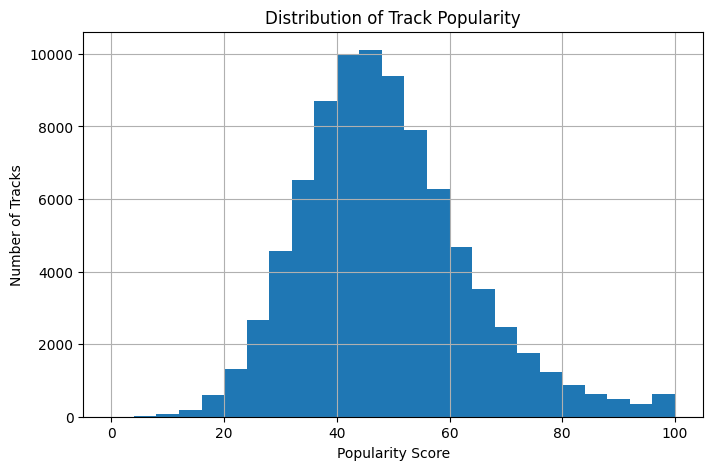

In [36]:
plt.figure(figsize=(8,5))
data['popularity'].hist(bins=25)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.show()


### 🎧 Popularity Distribution

This histogram shows how track popularity scores are distributed across the dataset.


**Insight:**
- Most tracks fall into the mid-range popularity scores.
- Only a small number of songs achieve very high popularity.
- This reflects a common pattern in music platforms where only a few tracks become major hits.


In [44]:
data.groupby("artist_name").count().sort_values(by="track_name", ascending=False)["track_name"]

,track_name
artist_name,
Michael Smith,44
Michael Johnson,42
David Smith,33
Christopher Johnson,28
Christopher Smith,27
...,...
Jamie Shaw,1
Jamie Schwartz,1
Jamie Schultz,1


### 🎤 Most Prolific Artists

This analysis identifies artists with the highest number of tracks in the dataset.


**Insight:**
- A small number of artists contribute a disproportionately large number of tracks.
- High track count does not necessarily mean higher popularity, but indicates strong platform presence.


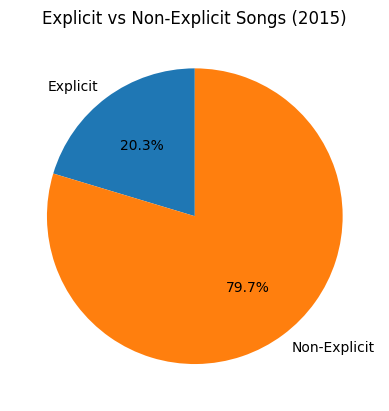

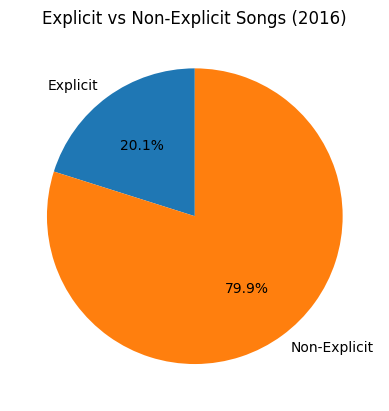

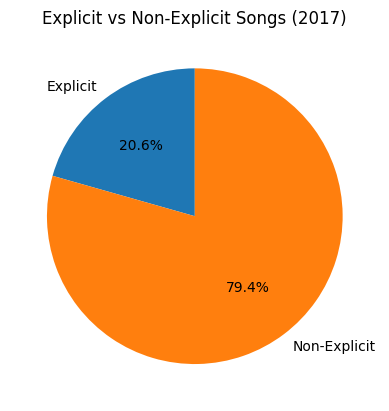

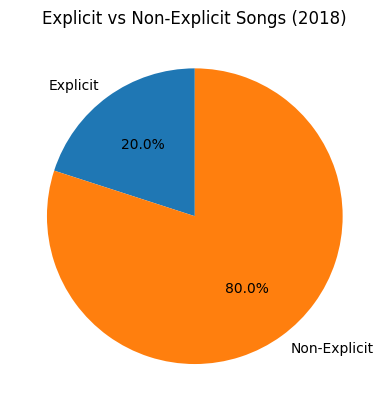

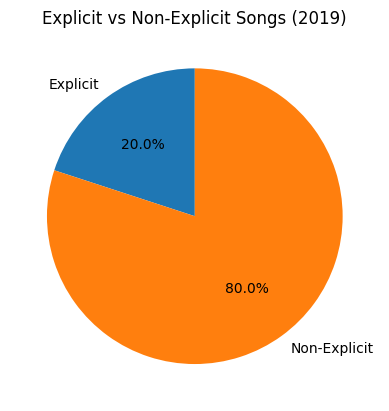

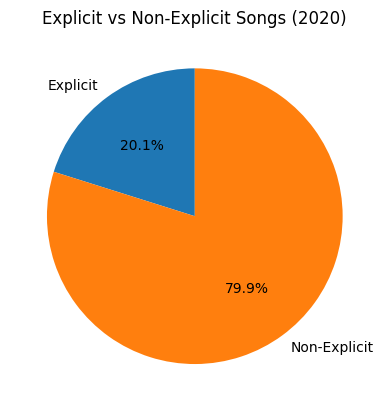

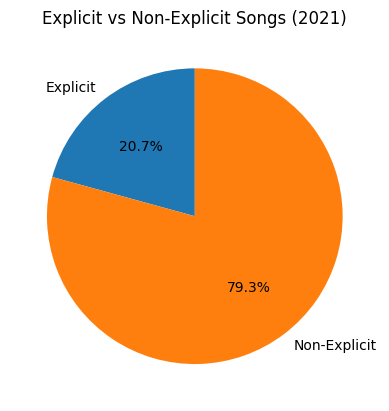

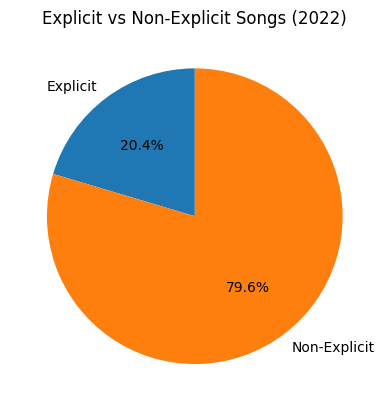

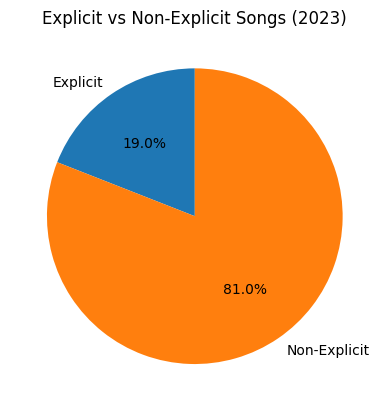

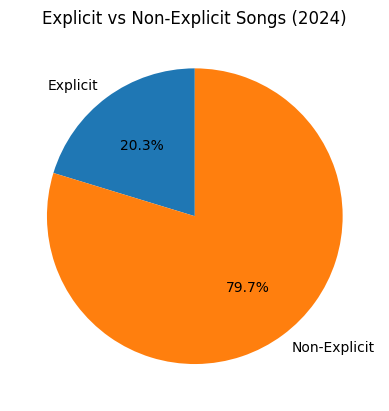

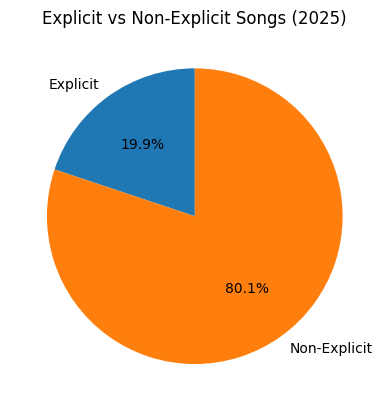

In [38]:
years = sorted(data['release_year'].dropna().unique())
for yr in years:
    year_data = data[data['release_year'] == yr]

    # Count explicit vs non-explicit
    counts = year_data['explicit'].value_counts()

    # Ensure both categories exist
    explicit_count = counts.get(True, 0)
    non_explicit_count = counts.get(False, 0)

    plt.figure()
    plt.pie(
        [explicit_count, non_explicit_count],
        labels=['Explicit', 'Non-Explicit'],
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'Explicit vs Non-Explicit Songs ({yr})')
    plt.show()

### 📆 Explicit Content Trends by Year

The following charts show how explicit content distribution changes across different release years.


**Insight:**
- Explicit content has increased in recent years.
- This suggests changing audience preferences and evolving content policies.


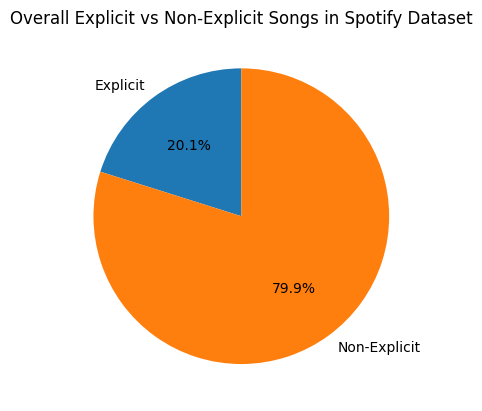

In [39]:


# Ensure explicit column is boolean
data['explicit'] = data['explicit'].astype(bool)

# Count explicit vs non-explicit songs
counts = data['explicit'].value_counts()

explicit_count = counts.get(True, 0)
non_explicit_count = counts.get(False, 0)

# Plot pie chart
plt.figure()
plt.pie(
    [explicit_count, non_explicit_count],
    labels=['Explicit', 'Non-Explicit'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Overall Explicit vs Non-Explicit Songs in Spotify Dataset')
plt.show()


### 🔞 Explicit vs Non-Explicit Songs (Overall)

This chart shows the overall proportion of explicit and non-explicit tracks in the dataset.


**Insight:**
- Non-explicit tracks slightly dominate the dataset.
- Explicit content still represents a significant portion of Spotify’s catalog.


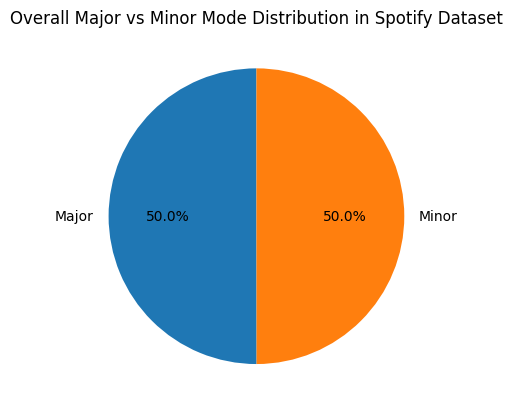

In [40]:
import matplotlib.pyplot as plt

# Count Major vs Minor directly
counts = data['mode'].value_counts()

major_count = counts.get('Major', 0)
minor_count = counts.get('Minor', 0)

# Plot pie chart
plt.figure()
plt.pie(
    [major_count, minor_count],
    labels=['Major', 'Minor'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Overall Major vs Minor Mode Distribution in Spotify Dataset')
plt.show()


### 🎼 Musical Mode Distribution (Overall)

This chart compares tracks composed in Major and Minor musical modes.


**Insight:**
- Major mode songs are more common overall.
- This aligns with the popularity of upbeat and positive music styles.


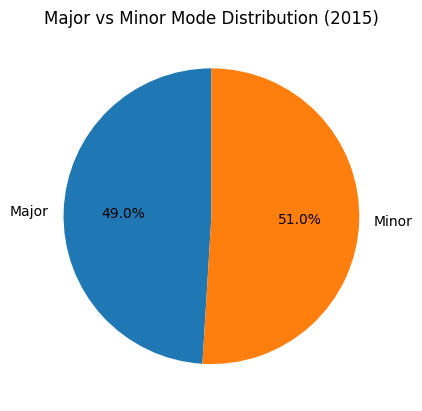

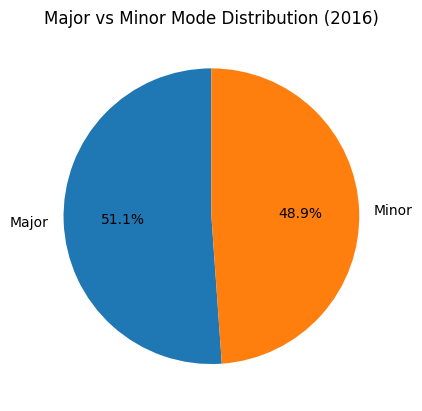

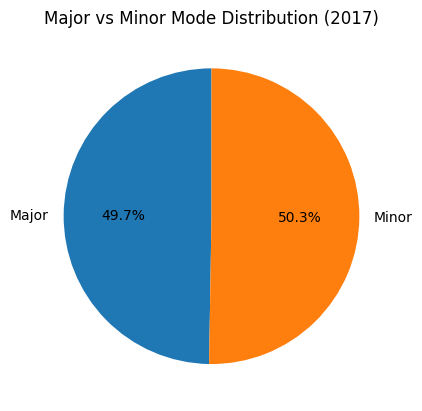

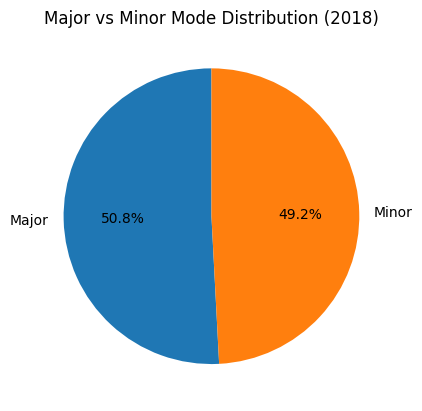

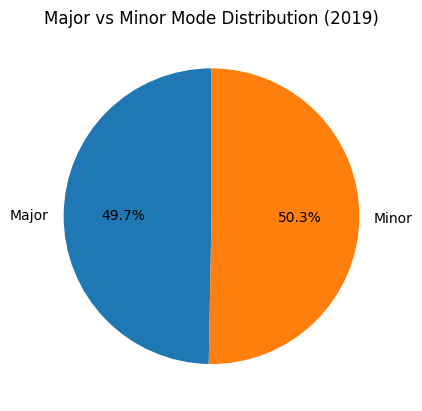

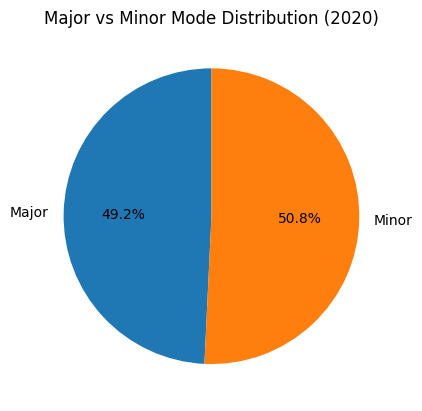

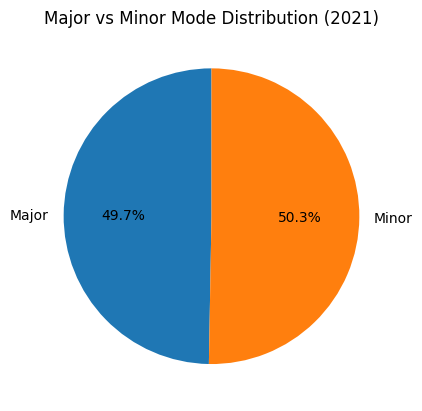

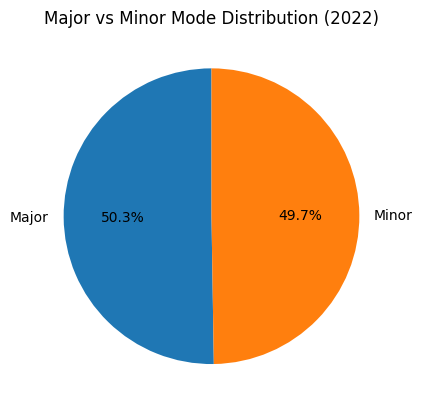

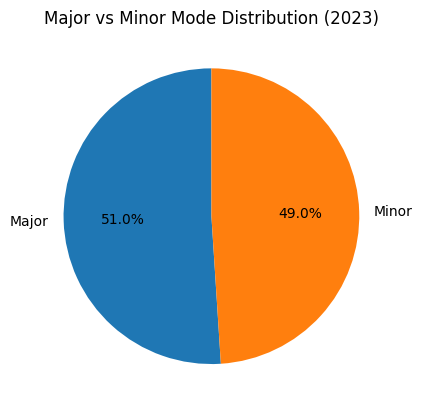

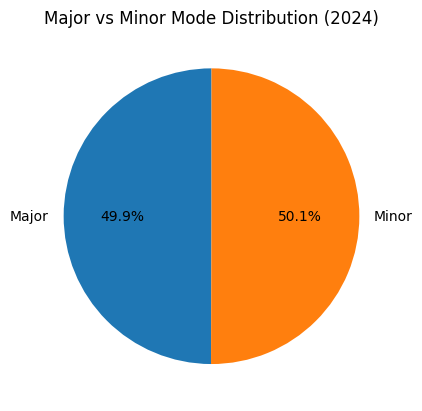

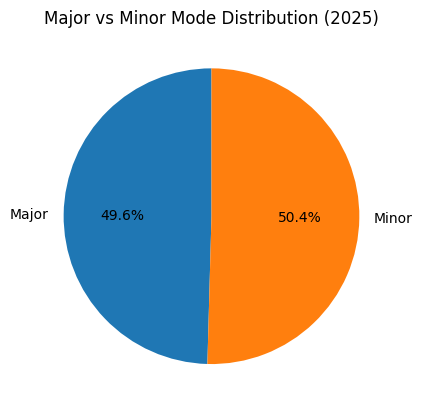

In [41]:
import matplotlib.pyplot as plt

# Clean mode column (safety)
data['mode'] = data['mode'].str.strip().str.title()

# Get sorted unique release years
years = sorted(data['release_year'].dropna().unique())

for yr in years:
    year_data = data[data['release_year'] == yr]

    # Count Major vs Minor
    counts = year_data['mode'].value_counts()

    major_count = counts.get('Major', 0)
    minor_count = counts.get('Minor', 0)

    plt.figure()
    plt.pie(
        [major_count, minor_count],
        labels=['Major', 'Minor'],
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'Major vs Minor Mode Distribution ({yr})')
    plt.show()



### 📆 Musical Mode Trends by Year

These charts show how musical mood (Major vs Minor) changes across release years.


**Insight:**
- While Major mode dominates, Minor mode usage increases in certain periods.
- This reflects shifts toward more emotional or introspective music styles.


In [42]:
data.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label,release_year
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,pop,234194,55,0.15,0.74,9,-32.22,Minor,0.436,73.12,13000,Brazil,False,Universal Music,2016
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,metal,375706,45,0.44,0.46,0,-14.02,Minor,0.223,157.74,1000,France,True,Island Records,2022
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,rock,289191,55,0.62,0.80,8,-48.26,Major,0.584,71.03,1000,Germany,True,XL Recordings,2016
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,pop,209484,51,0.78,0.98,1,-34.47,Major,0.684,149.00,1000,France,False,Warner Music,2015
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,indie,127435,39,0.74,0.18,10,-17.84,Minor,0.304,155.85,2000,United States,False,Independent,2022


In [43]:
data.to_csv("spotify_cleaned.csv", index=False)

## ☁️ BigQuery & Looker Studio Integration

After cleaning, the dataset was uploaded to Google BigQuery for scalable SQL analysis.

Key steps:
- Uploaded cleaned CSV to BigQuery
- Created analytical views for reusable queries
- Used window functions to rank top artists per year
- Connected BigQuery views to Looker Studio

An interactive dashboard was built to visualize KPIs and trends.


## ✅ Conclusion

This project demonstrates an end-to-end data analytics workflow:
- Data cleaning and preparation in Python
- SQL-based analysis in BigQuery
- Interactive visualization in Looker Studio

The insights generated can help music platforms make data-driven decisions related to content strategy and user engagement.

Future improvements could include:
- Predictive modeling for popularity
- Deeper audio feature analysis
- User-level listening behavior
